In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# link colab to drive to access datasets in drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Google Colab/datasets/Cali house prices/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
#train and test set
from sklearn.model_selection import train_test_split

x = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [ ]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2)

In [ ]:
train_df = x_train.join(y_train)
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
10305,-117.78,33.88,16.0,1800.0,238.0,871.0,234.0,6.6678,<1H OCEAN,301900.0
712,-122.08,37.67,29.0,493.0,168.0,233.0,152.0,0.9637,NEAR BAY,160000.0
17766,-121.85,37.34,27.0,1481.0,409.0,1505.0,391.0,2.5769,<1H OCEAN,137500.0
16810,-122.41,37.65,32.0,3436.0,868.0,2583.0,817.0,3.5039,NEAR OCEAN,232400.0
2186,-120.00,36.70,33.0,1902.0,370.0,1168.0,358.0,2.6852,INLAND,70800.0
...,...,...,...,...,...,...,...,...,...,...
20441,-118.78,34.26,24.0,4072.0,582.0,1834.0,565.0,6.0487,<1H OCEAN,254500.0
11344,-117.92,33.75,8.0,2325.0,598.0,1511.0,565.0,3.3629,<1H OCEAN,137500.0
3009,-118.99,35.24,40.0,282.0,59.0,213.0,71.0,2.3500,INLAND,91700.0
4601,-118.27,34.05,24.0,323.0,214.0,751.0,189.0,1.8304,<1H OCEAN,225000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

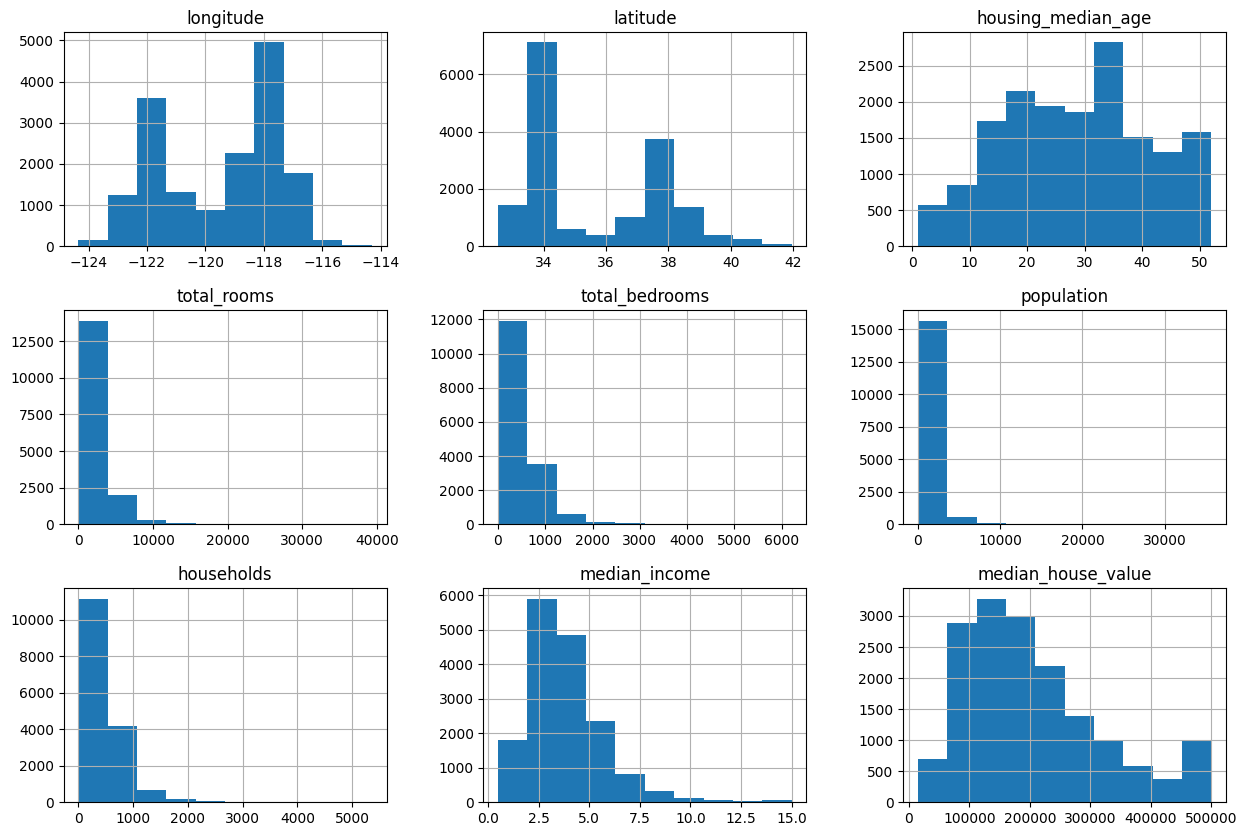

In [ ]:
train_df.hist(figsize=(15, 10))

<Axes: >

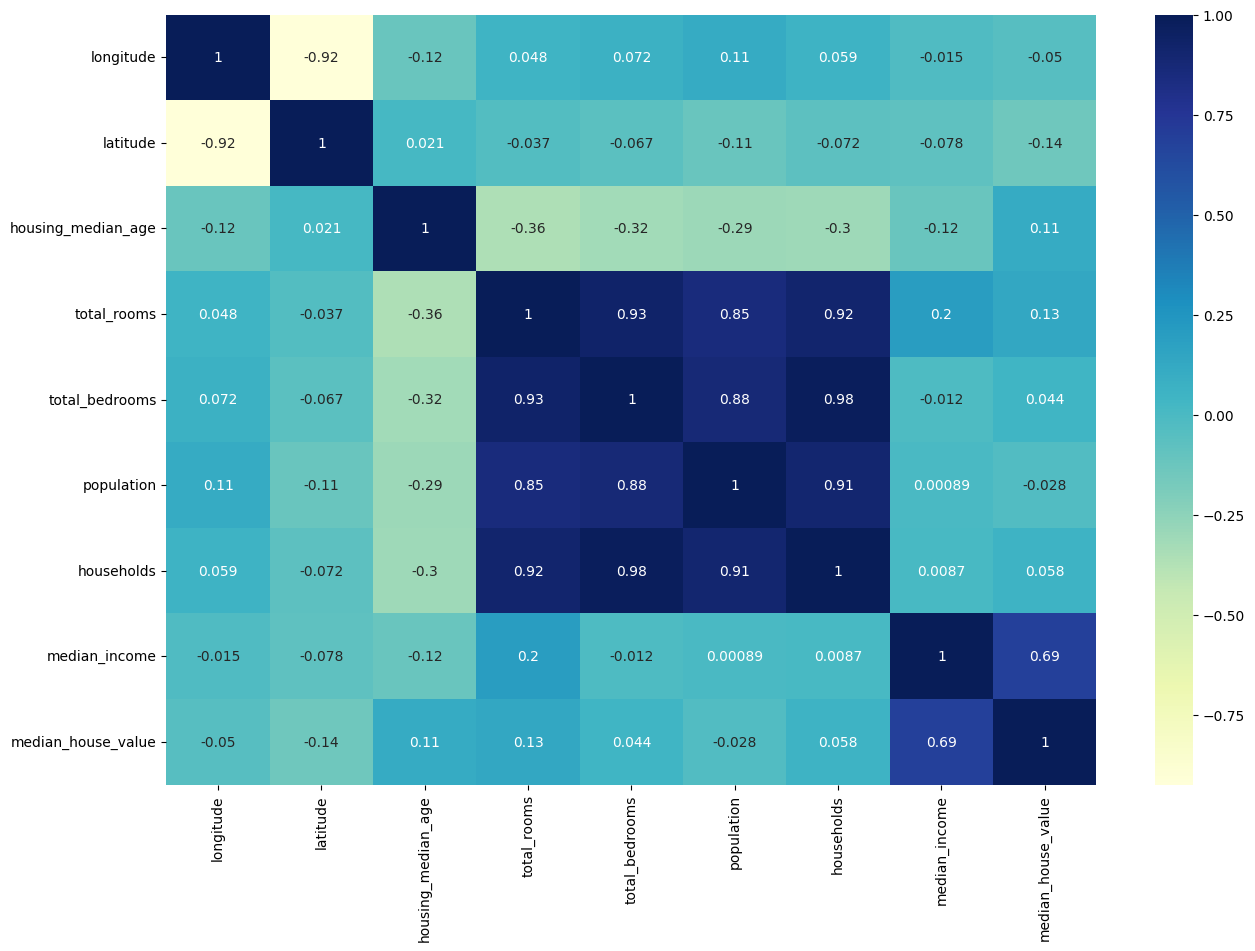

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='YlGnBu')

In [ ]:
train_df['total_rooms'] = np.log(train_df['total_rooms'] + 1)
train_df['total_bedrooms'] = np.log(train_df['total_bedrooms'] + 1)
train_df['population'] = np.log(train_df['population'] + 1)
train_df['households'] = np.log(train_df['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

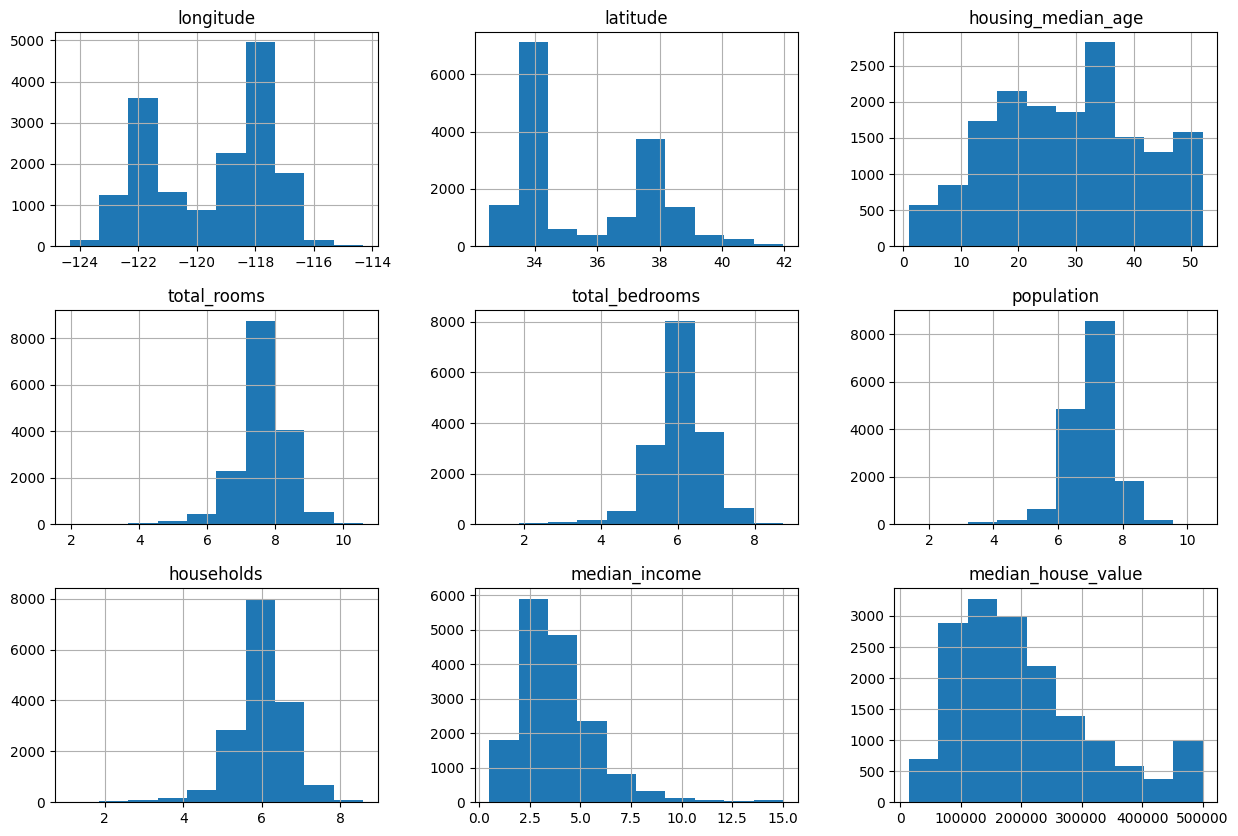

In [ ]:
train_df.hist(figsize=(15, 10))

In [ ]:
#dummy variables for ocean proximity
train_df = train_df.join(pd.get_dummies(train_df['ocean_proximity'])).drop(['ocean_proximity'], axis=1)

<Axes: >

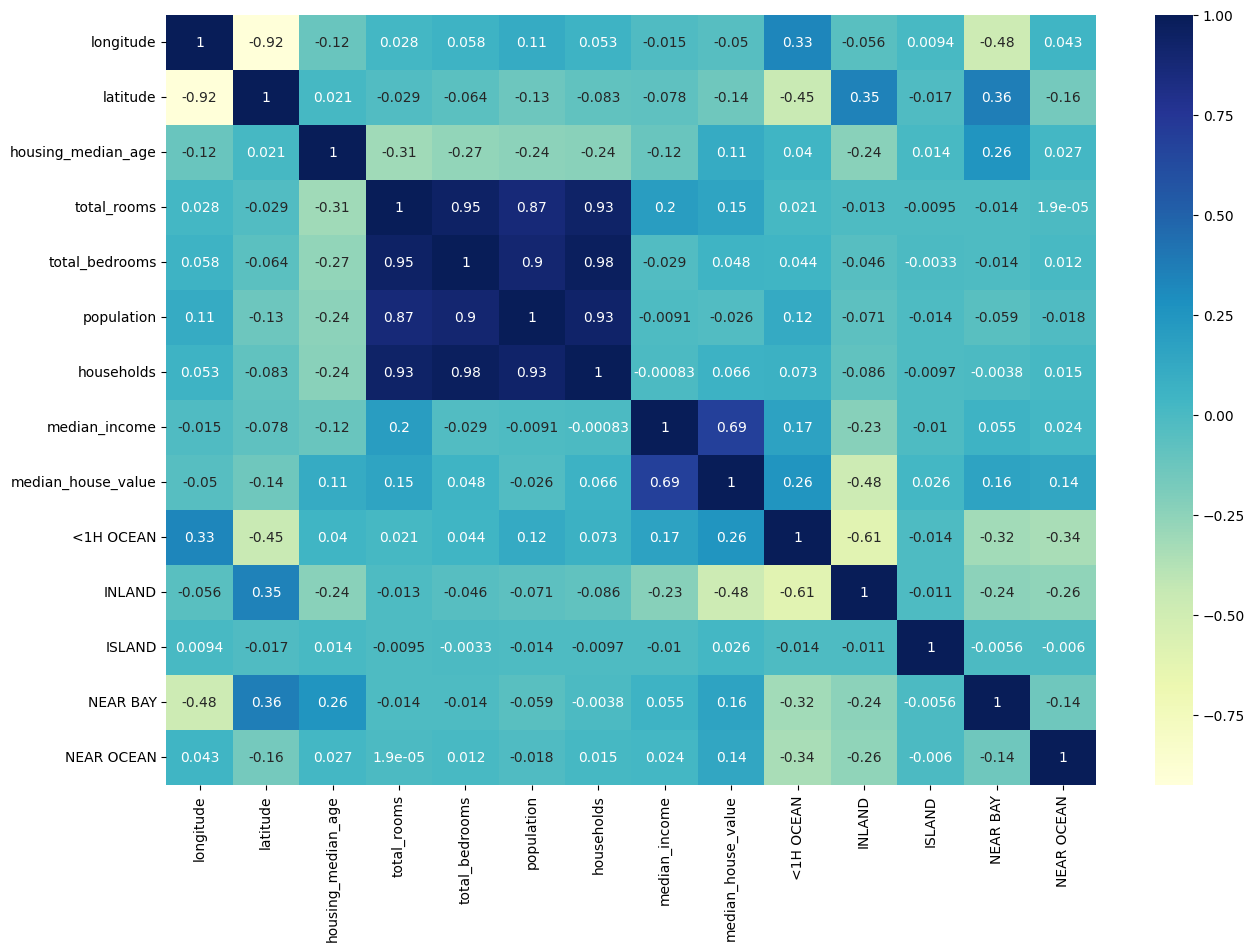

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

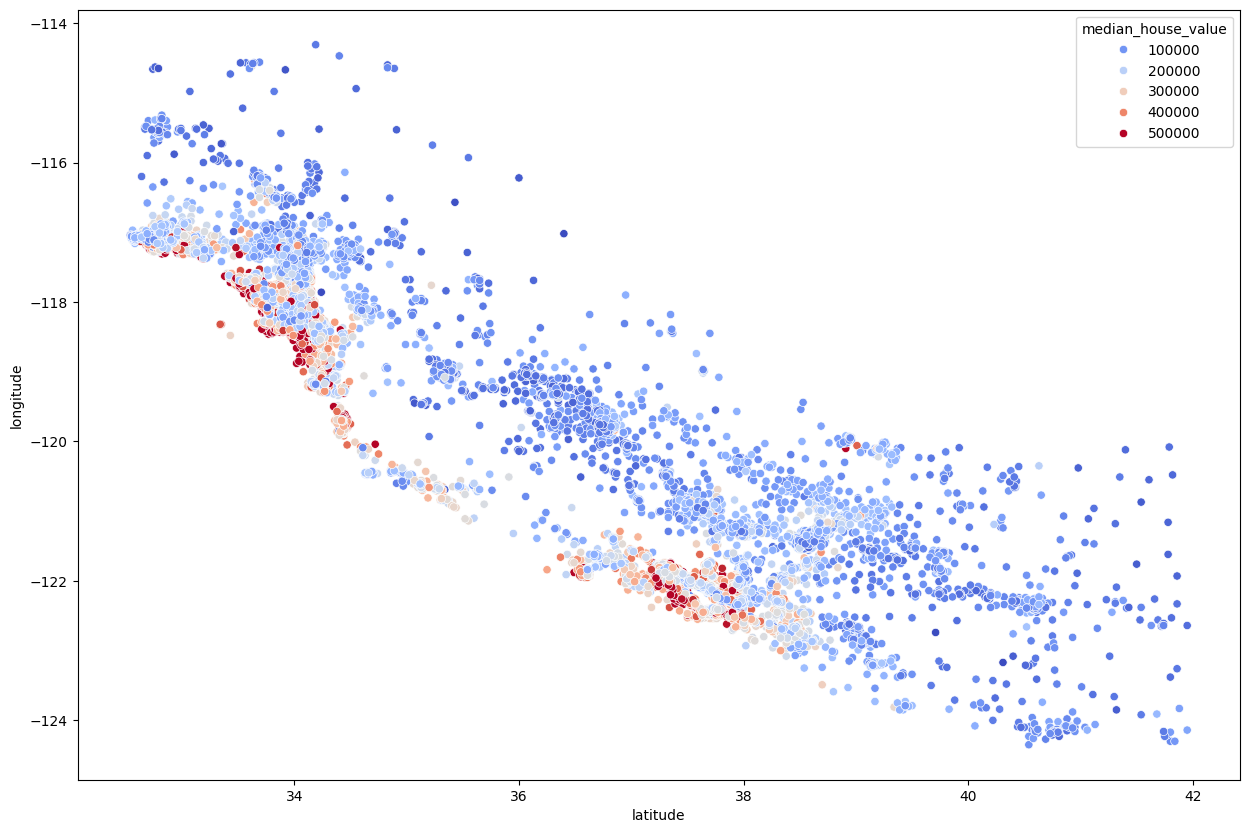

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='latitude', y='longitude', data=train_df, hue='median_house_value', palette='coolwarm')

In [ ]:
train_df['bedroom_ratio'] = train_df['total_bedrooms'] / train_df['total_rooms']
train_df['household_rooms'] = train_df['total_rooms'] / train_df['households']

<Axes: >

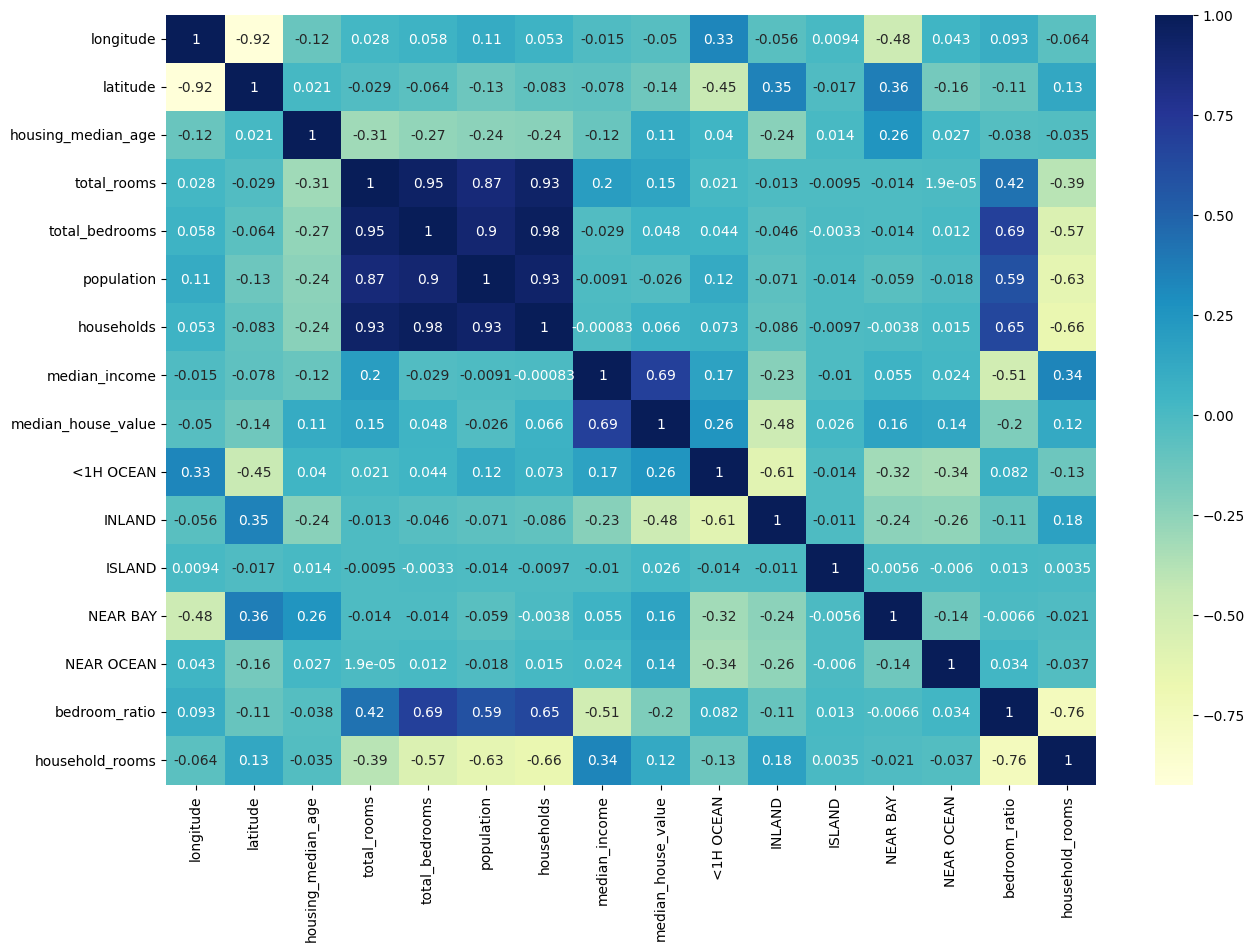

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(train_df.corr(), annot=True, cmap='YlGnBu')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_df.drop(['median_house_value'], axis=1), train_df['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train_s, y_train)

LinearRegression()

In [ ]:
test_df = x_test.join(y_test)

test_df['total_rooms'] = np.log(test_df['total_rooms'] + 1)
test_df['total_bedrooms'] = np.log(test_df['total_bedrooms'] + 1)
test_df['population'] = np.log(test_df['population'] + 1)
test_df['households'] = np.log(test_df['households'] + 1)

test_df = test_df.join(pd.get_dummies(test_df['ocean_proximity'])).drop(['ocean_proximity'], axis=1)

test_df['bedroom_ratio'] = test_df['total_bedrooms'] / test_df['total_rooms']
test_df['household_rooms'] = test_df['total_rooms'] / test_df['households']

In [ ]:
x_test, y_test = test_df.drop(['median_house_value'], axis=1), test_df['median_house_value']

In [ ]:
x_test_s = scaler.fit_transform(x_test)

In [ ]:
reg.score(x_test_s, y_test)

0.6895269233392518

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
forest.score(x_test, y_test)

0.8236542233901634

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 4, 8],
    'min_samples_split': [2, 4]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(x_test_s, y_test)

0.7641795802131582